<a href="https://colab.research.google.com/github/Tamilrjk/Airline-Review/blob/main/Airline_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis
 We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder

In [ ]:

df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The worst airline I have e...
1,"✅ Trip Verified | Excellent service levels, ..."
2,Not Verified | Booked a very special holiday ...
3,"Not Verified | Just returned from Chicago, fle..."
4,✅ Trip Verified | BA standards continue to de...


#Data Preprocessing

In [ ]:
# Data Cleaning and Preprocessing
# Assuming you have a 'text' column containing the review text
# Cleaning and preprocessing steps
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    # Remove special characters, numbers, and extra spaces
    text = text.lower()
    text = ' '.join(word for word in text.split() if word.isalpha())
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [ ]:
df

,reviews,cleaned_reviews
0,✅ Trip Verified | The worst airline I have e...,trip verified worst airline ever flown allocat...
1,"✅ Trip Verified | Excellent service levels, ...",trip verified excellent service proactive crew...
2,Not Verified | Booked a very special holiday ...,verified booked special holiday september arri...
3,"Not Verified | Just returned from Chicago, fle...",verified returned flew days ago american airli...
4,✅ Trip Verified | BA standards continue to de...,trip verified ba standards continue decline ev...
...,...,...
995,✅ Trip Verified | Johannesburg to London. In ...,trip verified johannesburg contrast excellent ...
996,✅ Trip Verified | Antigua to Gatwick. One of ...,trip verified antigua one worst business class...
997,✅ Trip Verified | Gatwick to Barbados. First ...,trip verified gatwick first class third disgus...
998,✅ Trip Verified | Cape Town to London. Very u...,trip verified cape town unimpressive amenities...


#EDA

In [ ]:
# Sentiment Analysis
# Using VADER sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x))
df['sentiment'] = df['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] >= 0 else 'negative')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


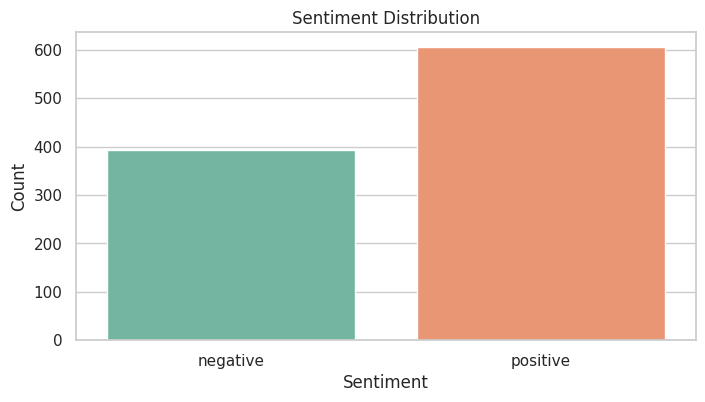

In [ ]:
# Create a count plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')  # You can change 'palette' for different color schemes
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
# Topic Modeling using LDA
n_topics = 5  # Number of topics to extract
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = vectorizer.fit_transform(df['cleaned_reviews'])
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tf)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic #1: ba trip british luggage airways flight plane london bag arrived
Topic #2: flight trip business seat class seats ba economy staff london
Topic #3: flight trip crew food ba good service cabin seat time
Topic #4: flight ba trip customer british told booked service airways hours
Topic #5: ba staff trip flight class service food heathrow business cabin


In [ ]:
# Create Word Clouds
def generate_word_cloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

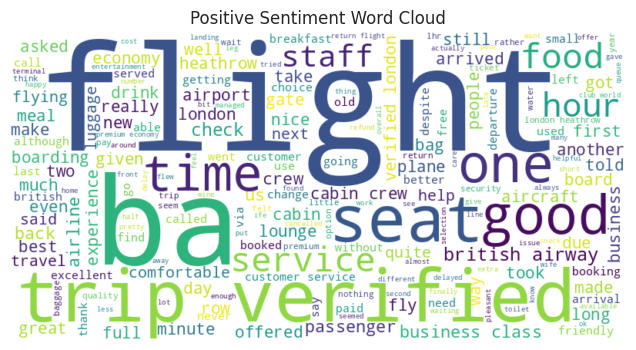

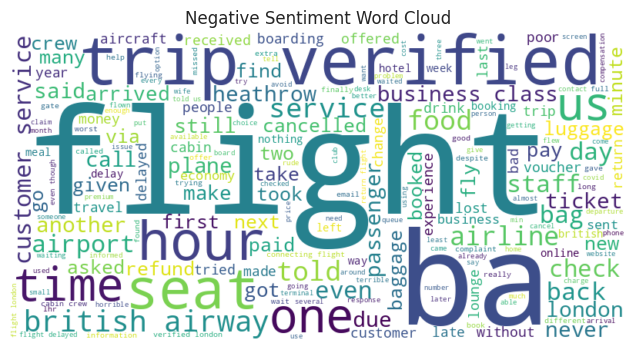

In [ ]:
# Generate word clouds for positive and negative sentiment reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_reviews'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_reviews'])

generate_word_cloud(positive_reviews, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_reviews, 'Negative Sentiment Word Cloud')

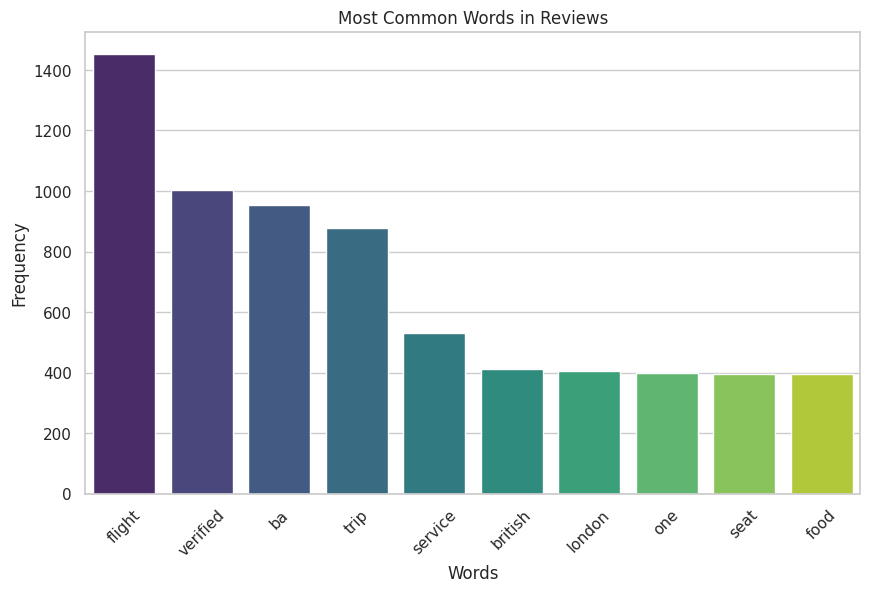

In [ ]:
# Combine all the words in the 'cleaned_text' column and split them
words = ' '.join(df['cleaned_reviews']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette='viridis')
plt.title('Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()






#ML Model

## Predicting Costomer Buying Behaviour

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# Create a target variable 'Purchase' (1 for customers who purchased, 0 for those who didn't)
# You can define this based on certain criteria, e.g., if they mentioned "booking" or "purchase" in their review text.
df['Purchase'] = df['reviews'].str.contains('booking|purchase', case=False).astype(int)

In [ ]:
# Calculate review length
df['review_length'] = df['cleaned_reviews'].apply(len)


In [ ]:
# Assuming you have a 'sentiment_scores' column containing sentiment dictionaries
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])


In [ ]:
df

,reviews,cleaned_reviews,sentiment_scores,sentiment,Purchase,review_length,compound_score
0,✅ Trip Verified | The worst airline I have e...,trip verified worst airline ever flown allocat...,"{'neg': 0.211, 'neu': 0.742, 'pos': 0.048, 'co...",negative,0,237,-0.7786
1,"✅ Trip Verified | Excellent service levels, ...",trip verified excellent service proactive crew...,"{'neg': 0.022, 'neu': 0.556, 'pos': 0.421, 'co...",positive,0,481,0.9875
2,Not Verified | Booked a very special holiday ...,verified booked special holiday september arri...,"{'neg': 0.108, 'neu': 0.749, 'pos': 0.143, 'co...",positive,1,1362,0.8958
3,"Not Verified | Just returned from Chicago, fle...",verified returned flew days ago american airli...,"{'neg': 0.095, 'neu': 0.696, 'pos': 0.209, 'co...",positive,0,383,0.7902
4,✅ Trip Verified | BA standards continue to de...,trip verified ba standards continue decline ev...,"{'neg': 0.175, 'neu': 0.706, 'pos': 0.118, 'co...",negative,0,637,-0.6908
...,...,...,...,...,...,...,...
995,✅ Trip Verified | Johannesburg to London. In ...,trip verified johannesburg contrast excellent ...,"{'neg': 0.035, 'neu': 0.722, 'pos': 0.243, 'co...",positive,0,415,0.9201
996,✅ Trip Verified | Antigua to Gatwick. One of ...,trip verified antigua one worst business class...,"{'neg': 0.112, 'neu': 0.644, 'pos': 0.243, 'co...",positive,0,238,0.7430
997,✅ Trip Verified | Gatwick to Barbados. First ...,trip verified gatwick first class third disgus...,"{'neg': 0.352, 'neu': 0.578, 'pos': 0.07, 'com...",negative,0,212,-0.8807
998,✅ Trip Verified | Cape Town to London. Very u...,trip verified cape town unimpressive amenities...,"{'neg': 0.056, 'neu': 0.828, 'pos': 0.116, 'co...",positive,0,370,0.7003


In [ ]:
X = df[['compound_score', 'review_length']]  # Features
y = df['Purchase']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the classifier (you can choose a different one)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.86


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       174
           1       0.40      0.08      0.13        26

    accuracy                           0.86       200
   macro avg       0.64      0.53      0.53       200
weighted avg       0.81      0.86      0.82       200



In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.64
